# ABS Quarterly Producer Prices Index  6427

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Python-set-up" data-toc-modified-id="Python-set-up-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Python set-up</a></span></li><li><span><a href="#Get-data-from-ABS" data-toc-modified-id="Get-data-from-ABS-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Get data from ABS</a></span></li><li><span><a href="#Plot" data-toc-modified-id="Plot-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Plot</a></span><ul class="toc-item"><li><span><a href="#Set-up-some-constants-we-will-use-across-all-plots" data-toc-modified-id="Set-up-some-constants-we-will-use-across-all-plots-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Set-up some constants we will use across all plots</a></span></li><li><span><a href="#Remove-the-old-charts" data-toc-modified-id="Remove-the-old-charts-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Remove the old charts</a></span></li><li><span><a href="#Headline-PPI-for-Australia" data-toc-modified-id="Headline-PPI-for-Australia-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Headline PPI for Australia</a></span></li></ul></li><li><span><a href="#Finished" data-toc-modified-id="Finished-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Finished</a></span></li></ul></div>

## Python set-up

In [1]:
# system imports
import sys
import pathlib  
import re

# analytic imports
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# local imports
from finalise_plot import finalise_plot
from abs_common import (
    get_fs_constants,
    get_plot_constants,
    get_ABS_meta_and_data,
    get_identifier,
    plot_growth2
)

# pandas display settings
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
pd.options.display.max_colwidth = 100

# plotting stuff
plt.style.use('fivethirtyeight')

In [2]:
catalogue_id = '6427'
source, CHART_DIR, META_DATA = get_fs_constants(catalogue_id)

## Get data from ABS

In [3]:
# do the data capture and extraction to a DataFrame
abs_dict = get_ABS_meta_and_data(catalogue_id)
if abs_dict is None:
    sys.exit(-1)

Found URL for a ZIP file on ABS web page
Retrieving zip-file from cache ...
Extracting DataFrames from the zip-file ...


## Plot

### Set-up some constants we will use across all plots

In [4]:
meta = abs_dict[META_DATA]
RECENT, plot_times, plot_tags = get_plot_constants(meta)

In [5]:
#meta

### Remove the old charts

In [6]:
for filename in pathlib.Path(CHART_DIR).glob("*.png"):
    filename.unlink()

### Headline PPI for Australia

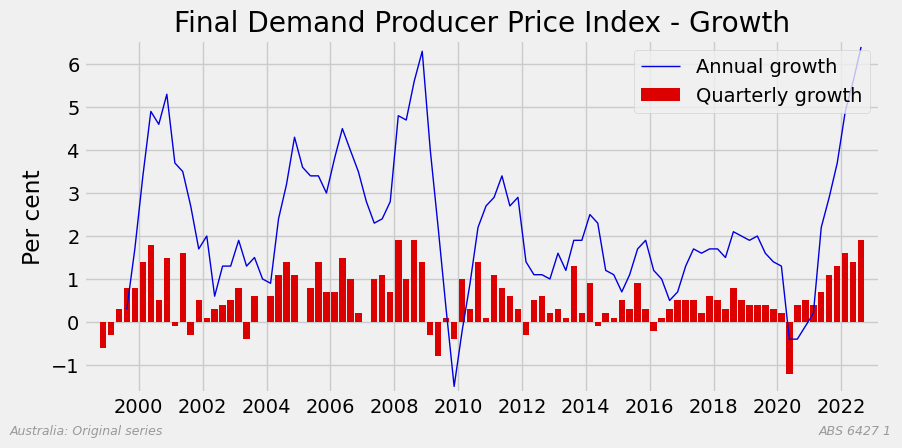

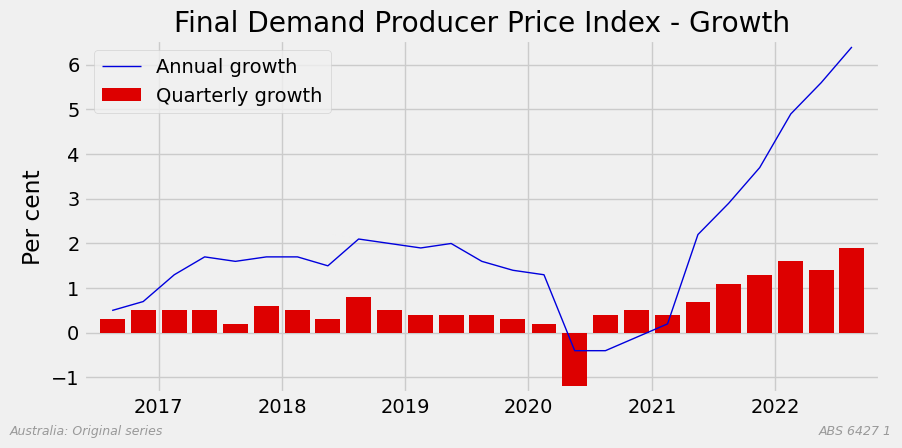

In [7]:
table = '1'
data = abs_dict[table]
series_type = 'Original'
title = 'Final ;  Total (Source) ;'
quarterly_desc = f'Percentage change from previous quarter ;  {title}'
annual_desc = f'Percentage change from corresponding quarter of previous year ;  {title}'

identifiers = []
for description in (annual_desc, quarterly_desc):
    ident, units = get_identifier(meta, description, series_type, table)
    identifiers.append(ident)

# plot
title = 'Final Demand Producer Price Index - Growth'
for plot_from, plot_tag in zip(plot_times, plot_tags):
    plot_growth2(data[identifiers[0]], data[identifiers[1]], 
                 title, 
                 plot_from, plot_tag, CHART_DIR,
                 rfooter=f'{source} {table}',
                 lfooter=f'Australia: {series_type.capitalize()} series',
                 ppy=4, # four periods per year
                 show=True
                 )

## Finished

In [8]:
print('Finished')

Finished
